<a href="https://colab.research.google.com/github/SantiagoUtrillaWM/DataAnalysis2/blob/main/Santiago_Utrilla_Application_Mentor_Data_Science_DEVF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentor Data Science Test

## Libraries needed



In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Descriptive Analysis



### Data Exploration

In [2]:
url = 'https://raw.githubusercontent.com/SantiagoUtrillaWM/DataAnalysis2/main/e.csv'
df = pd.read_csv(url)
display(df.head(10))
display(df.info())
display(df.describe())

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
0,1,00:00:00:6a:17:ce,1,11,2,Wednesday,0,True,2676
1,2,00:00:00:6a:17:ce,1,11,2,Wednesday,1,True,2676
2,3,00:00:00:6a:78:ae,1,10,30,Sunday,20,False,0
3,4,00:00:02:fa:9c:12,1,11,13,Sunday,12,True,2272
4,5,00:00:08:7d:e2:58,3,11,4,Friday,19,False,0
5,6,00:00:31:04:ad:89,3,11,3,Thursday,5,False,0
6,7,00:00:31:04:bc:da,2,11,4,Friday,19,False,0
7,8,00:00:77:34:37:30,3,11,5,Saturday,17,False,0
8,9,00:01:0a:0f:ed:98,1,11,19,Saturday,16,False,0
9,10,00:02:00:19:05:6f,1,11,8,Tuesday,11,False,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      249556 non-null  int64 
 1   device_mac      249556 non-null  object
 2   branch_office   249556 non-null  int64 
 3   month_tz        249556 non-null  int64 
 4   day_tz          249556 non-null  int64 
 5   day_of_week_tz  249556 non-null  object
 6   hour_tz         249556 non-null  int64 
 7   visitor         249556 non-null  bool  
 8   tiempodeses     249556 non-null  int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 15.5+ MB


None

,Unnamed: 0,branch_office,month_tz,day_tz,hour_tz,tiempodeses
count,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000,249556.000000
mean,124778.500000,1.884339,10.875619,14.802581,13.637468,2374.752244
std,72040.756226,0.942488,0.330016,9.466301,5.273697,8058.886022
min,1.000000,1.000000,10.000000,1.000000,0.000000,0.000000
25%,62389.750000,1.000000,11.000000,7.000000,10.000000,0.000000
50%,124778.500000,1.000000,11.000000,13.000000,14.000000,0.000000
75%,187167.250000,3.000000,11.000000,24.000000,18.000000,421.000000
max,249556.000000,3.000000,11.000000,31.000000,23.000000,68062.000000


I can see that there are close to 250k sessions without Null Results.

Seeing at the data I decided to exclude the device because it could increase the posibility of overfitting the model. 

Other things I can find in the overview is that there is only 3 different branch offices, two months (oct & nov), the 31 days of the month, the 24h where 12am is written as 00 hours and most sessions duration is 0 seconds.

In [5]:
nVisits = df.visitor.value_counts().reset_index()
nVisits.columns = ['value', 'visitors']

In [6]:
pVisits = df.visitor.value_counts(normalize = True).reset_index()
pVisits.columns = ['value', 'visitors']

pVisits.head()

,value,visitors
0,False,0.658417
1,True,0.341583


Only 34% of the users were true visitors. 



Now I am going to do some data manipulation to graph different behaviors through the different days of the week and different hours.

In [7]:
timeCount = df.groupby(['hour_tz']).count()['day_tz'].reset_index()
timeCount.columns=['hour', 'visitors']

timeCount.head(10)

,hour,visitors
0,0,3661
1,1,2611
2,2,1900
3,3,1599
4,4,1569
5,5,2852
6,6,6809
7,7,10664
8,8,14459
9,9,14132


In [8]:
vTimeCount = df.groupby(['hour_tz','visitor'])['device_mac'].count().reset_index()
vTimeCount.columns=['hour', 'value', 'visitors']

isValue = vTimeCount['value'] == False
vTimeCountFalse = vTimeCount[isValue]

isValue = vTimeCount['value'] == True
vTimeCountTrue = vTimeCount[isValue]

vTimeCountTrue.head(10)

,hour,value,visitors
1,0,True,1480
3,1,True,1266
5,2,True,1000
7,3,True,891
9,4,True,839
11,5,True,894
13,6,True,1331
15,7,True,2320
17,8,True,3449
19,9,True,3955


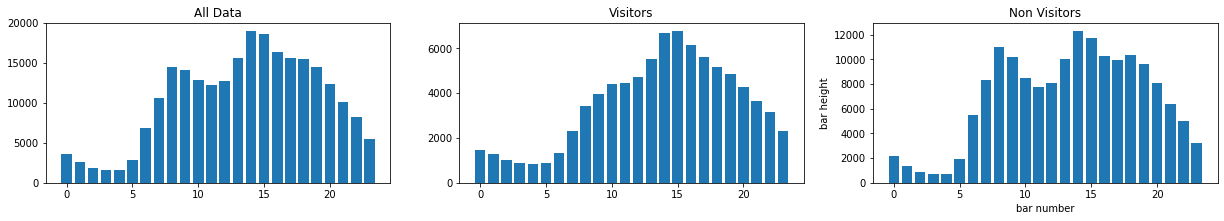

In [53]:
plt.figure(figsize=[21,10])
plt.subplot(3,3,1)
plt.bar(timeCount['hour'], timeCount['visitors'])
plt.title('All Data')

plt.subplot(3,3,2)
plt.bar(vTimeCountTrue['hour'], vTimeCountTrue['visitors'])
plt.title('Visitors')

plt.subplot(3,3,3)
plt.bar(vTimeCountFalse['hour'], vTimeCountFalse['visitors'])
plt.title('Non Visitors')

plt.xlabel("bar number")
plt.ylabel("bar height")

plt.show()

#timeCount.plot.bar(x='hour', y='visitors', rot=30, figsize=(15,10))
#plt.title(timeCount)

Although the visitors proportion is small vs the non visitors, it seems to have the same behaviour during the day except at 8 and 9 o'clock in the morning where is a peak in the non visitors.

In [10]:
timesDay = df.groupby(['day_of_week_tz']).count()['day_tz'].reset_index()
timesDay.columns=['dayWeek', 'visitors']
timesDay['dayWeek'] = pd.Categorical(timesDay['dayWeek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

timesDay = timesDay.sort_values(by = ['dayWeek'] )

In [11]:
vTimesDay = df.groupby(['day_of_week_tz','visitor'])['device_mac'].count().reset_index()
vTimesDay.columns=['dayWeek', 'value', 'visitors']
vTimesDay['dayWeek'] = pd.Categorical(vTimesDay['dayWeek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)

vTimesDay = vTimesDay.sort_values(by = ['dayWeek'] )

isValue2 = vTimesDay['value'] == False
vTimesDayFalse = vTimesDay[isValue2]

isValue2 = vTimesDay['value'] == True
vTimesDayTrue = vTimesDay[isValue2]

vTimesDayTrue.head(10)

,dayWeek,value,visitors
3,Monday,True,11975
11,Tuesday,True,13515
13,Wednesday,True,15696
9,Thursday,True,13822
1,Friday,True,9189
5,Saturday,True,11117
7,Sunday,True,9930


In the next graph we cna see the traffic is higher during the week than in the weekend.

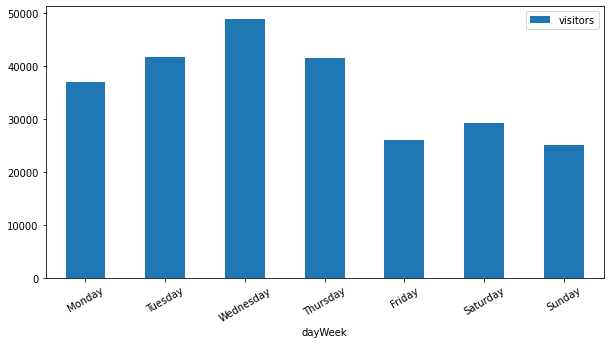

In [12]:
timesDay.plot.bar(x='dayWeek', y='visitors', rot=30, figsize=(10,5))

And if we compare this next graph (true visitors) vs the next second graph (false visitors) in proportion the false visitors decrease in the weekends.

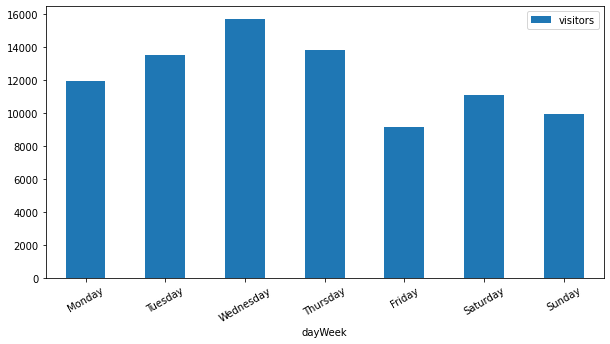

In [13]:
vTimesDayTrue.plot.bar(x='dayWeek', y='visitors', rot=30, figsize=(10,5))

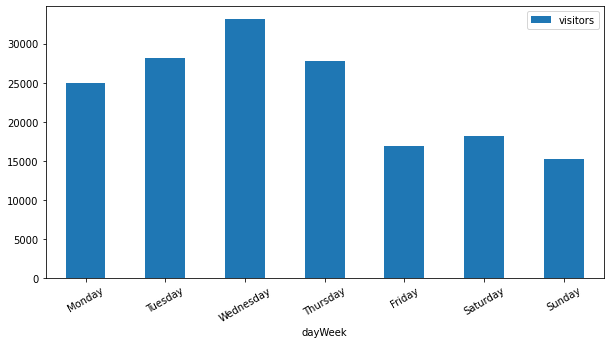

In [14]:
vTimesDayFalse.plot.bar(x='dayWeek', y='visitors', rot=30, figsize=(10,5))

## ML Model

For the ML model I decided first to try with a single tree, it is an algorithm that fits pretty well to this classification problem. If I get good results, I am going to train a random forest to be able to get even better results.

I would also like to mention that this section is divided into different parts:

1.   Functions definitions: functions that are going to be used to do some performance graphs and analysis.
2.   Model Training: here it is included the algorithm training and where I measure the performance of the algorithm

3.   Predictions: finally creating the new tags with the given data set and loading the data into a csv



### Functions definitions

In [15]:
from sklearn.model_selection import cross_val_score
def validate(model, X_train, y_train, k=10):
    result = 'K-fold cross validation:\n'
    scores = cross_val_score(estimator=model,
                             X=X_train,
                             y=y_train,
                             cv=k,
                             n_jobs=1)
    for i, score in enumerate(scores):
        result += "Iteration %d:\t%.3f\n" % (i, score)
    result += 'CV accuracy:\t%.3f +/- %.3f' % (np.mean(scores), np.std(scores))
    return result

In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def learningCurve(model, X_train, y_train, k=10):
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=model,
                                   X=X_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=k,
                                   n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.rcParams["figure.figsize"] = [6,6]
    fsize=14
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples', fontsize=fsize)
    plt.ylabel('Accuracy', fontsize=fsize)
    plt.legend(loc='lower right')
    plt.ylim([0.4, 1.03])
    plt.tight_layout()
    plt.show()

In [17]:
from sklearn.model_selection import validation_curve

def validationCurve(model, X_train, y_train,p_name, p_range, k=10, scale=False):
    train_scores, test_scores = validation_curve(
                    estimator=model, 
                    X=X_train, 
                    y=y_train, 
                    param_name=p_name,
                    param_range=p_range,
                    cv=k)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.rcParams["figure.figsize"] = [6,6]
    fsize=14
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.plot(p_range, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(p_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')

    plt.plot(p_range, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(p_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    if scale:
        plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Parameter %s' % p_name, fontsize=fsize)
    plt.ylabel('Accuracy', fontsize=fsize)
    plt.ylim([0.7, 1.0])
    plt.tight_layout()
    plt.show()

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

def rocCurve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.rcParams["figure.figsize"] = [8,8]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
from sklearn.metrics import confusion_matrix

def confusionMatrix(model, X_train, y_train, X_test, y_test): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.8)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

### Model Training

First the data sets are divided in training and testing, where testing is going to be 20% of the total data set. Also the visitor value is set as the predicted value.

In [20]:
features = ['branch_office','month_tz', 'day_tz',	'hour_tz',	'tiempodeses']

X_train, X_test, y_train, y_test = train_test_split(df[features],
                                                    df["visitor"],
                                                    test_size = 0.2,
                                                    stratify = df['visitor'])

#### Decision Tree

Then the decision tree is trained and validated to see it's performance.

In [21]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
print("Decision Tree score (Train): {0:.2}".format(dt.score(X_train, y_train)))
print("Decision Tree score (Test): {0:.2}".format(dt.score(X_test, y_test)))
print(validate(dt, X_train, y_train))

Decision Tree score (Train): 1.0
Decision Tree score (Test): 0.95
K-fold cross validation:
Iteration 0:	0.952
Iteration 1:	0.955
Iteration 2:	0.953
Iteration 3:	0.952
Iteration 4:	0.953
Iteration 5:	0.951
Iteration 6:	0.952
Iteration 7:	0.953
Iteration 8:	0.952
Iteration 9:	0.952
CV accuracy:	0.952 +/- 0.001


As expected, it has a good accuracy, 95% so the plan goes on, I am going to try the random forest algorithm.

#### Random Forest

##### Algorithm


In [30]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=3,
                                criterion='gini',
                                max_depth=3,
                                min_samples_split=10,
                                min_samples_leaf=5,
                                random_state=0)
X_train.head()
forest.fit(X_train, y_train)
print("Random Forest score (Train): {0:.2}".format(forest.score(X_train, y_train)))
print("Random Forest score (Test): {0:.2}".format(forest.score(X_test, y_test)))
print(validate(forest, X_train, y_train))

Random Forest score (Train): 0.96
Random Forest score (Test): 0.96
K-fold cross validation:
Iteration 0:	0.962
Iteration 1:	0.963
Iteration 2:	0.962
Iteration 3:	0.962
Iteration 4:	0.963
Iteration 5:	0.961
Iteration 6:	0.965
Iteration 7:	0.966
Iteration 8:	0.932
Iteration 9:	0.963
CV accuracy:	0.960 +/- 0.009


As expected, with a random forest that it is not deep, we were able to get better results. 

##### Metrics

First the confusion matrix is calculated and from here the different KPI's are measured.

[[80697  1459]
 [ 3208 39414]]


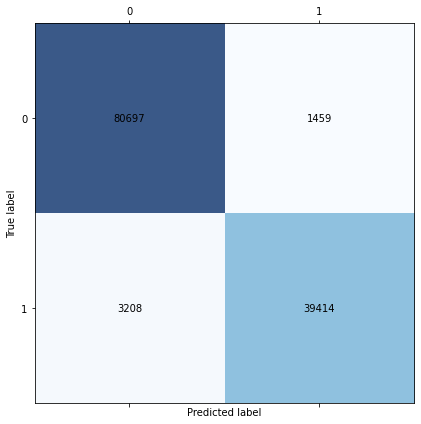

In [33]:
confusionMatrix(forest, X_train, y_train, X_test, y_test)

####Accuracy

The first is accuracy, this let us anwser how often the algorithm is correct. 

Accuracy can be determined by the number of correctly classified items divided by the total items

Accuracy = (39414 + 80697) / (80697 + 1459 + 3208 + 39414) = 96.25%

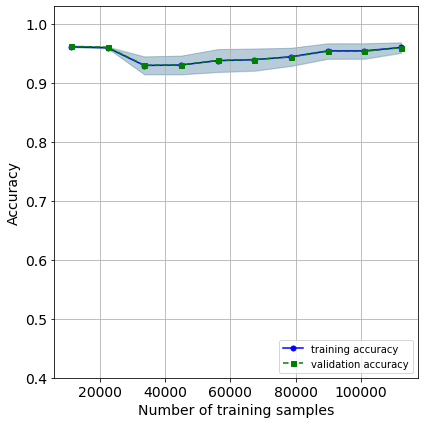

In [31]:
learningCurve(forest, X_train, y_train)

####Precision

The precision helps us measure how often the algorithm is correct when it predicts a positive result and it can be determined by true positives divided by true positives adding the true negatives.

Precision = (39414) / (39414 + 1459) = 96.43%

####Recall

The recall helps us measure when it is actuallly the positive result, how often the algorithm it predict correctly. This is calculated dividing true positive by the sum of true positives plus false negatives. 

Recall = (39414) / (39414 + 3208) = 92.47%

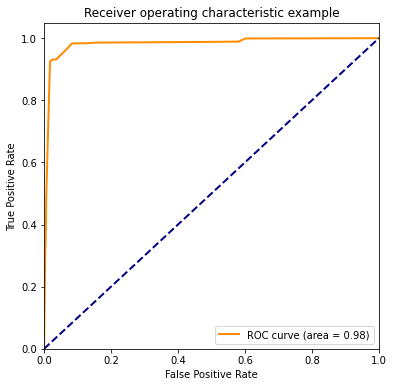

In [32]:
rocCurve(forest, X_test, y_test)

As we can see, we got pretty good results. For sure we can improve this algorithm and there are alternatives for this. We could try other algorithms, and also trying with different variants, for example, my hypothesis, from watching the recall, is that the algorithm is tagging all the sessions that has no duration (duration equals to 0) as false visitors and that's why we get that high number for false negatives so we could try to train the algorithm without that specific variant. But in resume, 96% accuracy but an algorithm is a great result, we would need to define what is important and then decide on which of this KPI's to focus on and start to bring different ideas to improve that specific metric.

### Predictions

Finally the test data set is downloaded. The Random Forest algorithm is used to predict the values and the results are ready :)

In [49]:
url = 'https://raw.githubusercontent.com/SantiagoUtrillaWM/DataAnalysis2/main/v.csv'
X_real = pd.read_csv(url)
df_X = pd.read_csv(url)
X_real = X_real[features]

In [50]:
forest = RandomForestClassifier(n_estimators=3,
                                criterion='gini',
                                max_depth=3,
                                min_samples_split=10,
                                min_samples_leaf=5,
                                random_state=0)
X_train.head()
forest.fit(X_train, y_train)
y_predict = pd.DataFrame(forest.predict(X_real))
y_predict.columns = ['visitors']

In [51]:
predictions = df_X.join(y_predict)
predictions.head()

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,visitors
0,1,a8:81:95:56:31:3c,1,11,17,Thursday,4,0,False
1,2,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,True
2,3,0c:b3:19:10:78:17,3,11,12,Saturday,10,0,False
3,4,44:74:6c:0a:20:23,3,11,27,Sunday,21,0,False
4,5,ac:5f:3e:c8:dc:35,1,11,27,Sunday,16,0,False


In [52]:
predictions.to_csv('e_predictions.csv')  